## What am I up to do:
- Analyze transaction and customer data to identify trends and inconsistencies. 
- Develop metrics and examine sales drivers to gain insights into overall sales performance. 
- Identify customer segments based on purchasing behavior.
- Create visualizations and prepare findings to formulate a clear recommendations.

### Examining Transaction Data

In [37]:
import pandas as pd

# loading transaction dataset as Excel
transactions = pd.read_excel(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\transaction_data.xlsx", sheet_name="in")
transactions.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
184684,2019-04-10,269,269012,265034,4,Dorito Corn Chp Supreme 380g,2,13.0
62694,2018-09-02,130,130024,133751,40,Thins Chips Seasonedchicken 175g,2,6.6
30515,2019-04-03,3,3177,1843,51,Doritos Mexicana 170g,2,8.8
101930,2018-08-31,35,35018,31611,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8
64725,2019-04-13,172,172096,173330,27,WW Supreme Cheese Corn Chips 200g,2,3.8
38910,2019-03-10,78,78039,75697,39,Smiths Crinkle Cut Tomato Salsa 150g,2,5.2
232650,2018-12-10,113,113181,116611,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
10023,2018-07-15,107,107017,108418,113,Twisties Chicken270g,2,9.2
188339,2019-04-24,48,48092,43617,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8
206212,2018-09-18,43,43163,39716,36,Kettle Chilli 175g,2,10.8


In [38]:
# define function for examining the data frame to avoid redundancy 
def analyze_df(df, show_nulls=True, show_duplicates=True, show_dtypes=True):
    
    if not isinstance(df, pd.DataFrame):
        print("invalid: the input must be a pandas DataFrame.")
        return False
    
    result = {}
    
    if show_nulls:
        nulls = df.isnull().sum()
        result['Null Counts'] = {
            'Total Nulls': nulls.sum(),
            'Nulls by Column': nulls
        }
    
    if show_duplicates:
        result['Duplicates'] = {
            'Total Duplicate Rows': df.duplicated().sum(),
            'Total Duplicate Columns': df.T.duplicated().sum()
        }
    
    if show_dtypes:
        result['Data Types'] = df.dtypes
    
    # print the result
    print(f"Analysis for DataFrame ({len(df)} rows, {len(df.columns)} columns)")
    print("=" * 60)
    
    for section, data in result.items():
        print(f"\n{section}:")
        print("-" * 40)
        if isinstance(data, dict):
            for k, v in data.items():
                print(f"{k}:")
                print(v.to_string() if hasattr(v, 'to_string') else v)
        else:
            print(data.to_string())
    
    return
    

In [39]:
# renaming columns
transactions.columns = [
    'Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID', 
    'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'
]

# examining data types and check for missing values
analyze_df(transactions, show_duplicates=False)

Analysis for DataFrame (264836 rows, 8 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0

Data Types:
----------------------------------------
Date                  datetime64[ns]
StoreNumber                    int64
LoyalityCardNumber             int64
TransactionID                  int64
ProductNumber                  int64
ProductName                   object
ProductQuantity                int64
TotalSales                   float64


In [40]:
# examine quantity and sales to ensure integrity
transactions[['ProductQuantity', 'TotalSales']].describe()

,ProductQuantity,TotalSales
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [41]:
# implement a function to measure Coefficient of Variation(CV) to check extreme variability.
def cv(col):
    col_cv = col.std() / col.mean() * 100
    result = ''
    if col_cv < 30:
        result = f"Low variability for '{col.name}' column, Data points are tightly clustered."
    elif col_cv > 30 and col_cv < 100:
        result = f"Moderate variability for '{col.name}' column, but data still within expected range."
    else:
        result = f"Extreme variability for '{col.name}' column. Check for potential outliers or errors"
    return result

print(cv(transactions['ProductQuantity']), '\n')
print(cv(transactions['TotalSales']))

Moderate variability for 'ProductQuantity' column, but data still within expected range. 

Moderate variability for 'TotalSales' column, but data still within expected range.


In [42]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(transactions.duplicated().sum())



Number of duplicated rows:
1


In [43]:
# drop the duplicated row
transactions.drop_duplicates(inplace=True)

### Examine Customer Data

In [44]:
# load purchace data as CSV
purchaseBehaviour = pd.read_csv(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\purchase_behaviour.csv")
purchaseBehaviour.sample(10)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
20729,75118,OLDER SINGLES/COUPLES,Budget
3264,12021,OLDER SINGLES/COUPLES,Mainstream
27577,101089,NEW FAMILIES,Mainstream
64806,242371,YOUNG SINGLES/COUPLES,Mainstream
44894,168211,OLDER FAMILIES,Budget
67210,251053,RETIREES,Premium
18379,67076,RETIREES,Mainstream
66109,248007,YOUNG FAMILIES,Mainstream
57607,217134,YOUNG SINGLES/COUPLES,Budget
4061,15205,RETIREES,Budget


In [45]:
# ranaming columns 
purchaseBehaviour.columns = [
    'LoyalityCardNumber', 'LifeStage', 'PremiumCustomer'
]

# examining data types and check for missing values
analyze_df(purchaseBehaviour, show_duplicates=False)

Analysis for DataFrame (72637 rows, 3 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
LoyalityCardNumber    0
LifeStage             0
PremiumCustomer       0

Data Types:
----------------------------------------
LoyalityCardNumber     int64
LifeStage             object
PremiumCustomer       object


In [46]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(purchaseBehaviour.duplicated().sum())



Number of duplicated rows:
0


In [47]:
# checking unique values for categorical columns
print('LifeStage column unique values:\n', purchaseBehaviour['LifeStage'].unique(), '\n')
print('PremiumCustomer column unique values:\n', purchaseBehaviour['PremiumCustomer'].unique())

LifeStage column unique values:
 ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

PremiumCustomer column unique values:
 ['Premium' 'Mainstream' 'Budget']


In [48]:
# splitting 'LifeStage' into 'AgeGroup' (or keeping 'LifeStage' for the age part) and 'SocialStatus' 
# to allow easy analyze trends purely based on the age group and martial status
split_data = purchaseBehaviour['LifeStage'].str.split(' ', expand=True, n=1)
purchaseBehaviour['AgeGroup'] = split_data[0]
purchaseBehaviour['SocialStatus'] = split_data[1]
purchaseBehaviour.drop(columns=['LifeStage'], inplace=True)

# ensure data splitted as intended
purchaseBehaviour.head()

,LoyalityCardNumber,PremiumCustomer,AgeGroup,SocialStatus
0,1000,Premium,YOUNG,SINGLES/COUPLES
1,1002,Mainstream,YOUNG,SINGLES/COUPLES
2,1003,Budget,YOUNG,FAMILIES
3,1004,Mainstream,OLDER,SINGLES/COUPLES
4,1005,Mainstream,MIDAGE,SINGLES/COUPLES


### Merging Transaction & Customer Data

In [49]:
# identify Common columns for merging
print("Transaction Columns:", transactions.columns)
print("Customer Columns:", purchaseBehaviour.columns)

Transaction Columns: Index(['Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID',
       'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'],
      dtype='object')
Customer Columns: Index(['LoyalityCardNumber', 'PremiumCustomer', 'AgeGroup', 'SocialStatus'], dtype='object')


In [50]:
# merge using 'LoyalityCardNumber' column
# I will use 'inner' to keep only matching records
full_df = pd.merge(left=transactions, right=purchaseBehaviour, on='LoyalityCardNumber', how='inner')

In [51]:
# verify the merge step
print(full_df.info())
print(full_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                264835 non-null  datetime64[ns]
 1   StoreNumber         264835 non-null  int64         
 2   LoyalityCardNumber  264835 non-null  int64         
 3   TransactionID       264835 non-null  int64         
 4   ProductNumber       264835 non-null  int64         
 5   ProductName         264835 non-null  object        
 6   ProductQuantity     264835 non-null  int64         
 7   TotalSales          264835 non-null  float64       
 8   PremiumCustomer     264835 non-null  object        
 9   AgeGroup            264835 non-null  object        
 10  SocialStatus        215072 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.2+ MB
None
             Date  StoreNumber  LoyalityCardNumber  Transacti

#### Note on SocialStatus Nulls
Null values in the *SocialStatus* column are a consequence of the splitting operation. This occurs for original *LifeStage* value (*RETIREES*) that comprise a single word, leaving no second component to accomodate the *SocialStatus* field.

In [52]:
# inspecting the nulls
full_df[full_df['SocialStatus'].isnull()][['AgeGroup', 'SocialStatus']].sample(5)

# fill the nulls with 'No-status'
full_df['SocialStatus'].fillna('No_STATUS', inplace=True)

# check null counts again
full_df.isnull().sum()

Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0
PremiumCustomer       0
AgeGroup              0
SocialStatus          0
dtype: int64

### Analysis & Customer Segments

In [53]:
full_df.head()

,Date,StoreNumber,LoyalityCardNumber,TransactionID,ProductNumber,ProductName,ProductQuantity,TotalSales,PremiumCustomer,AgeGroup,SocialStatus
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Premium,YOUNG,SINGLES/COUPLES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Budget,MIDAGE,SINGLES/COUPLES
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,Budget,MIDAGE,SINGLES/COUPLES
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,Budget,MIDAGE,SINGLES/COUPLES
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Budget,MIDAGE,SINGLES/COUPLES


In [54]:
# define Key Metrics
totalSales = full_df['TotalSales'].sum()
totalCustomers = full_df['LoyalityCardNumber'].nunique()
transactionsPerCustomer = full_df.groupby('LoyalityCardNumber')['TransactionID'].count().mean()

print(f"Total Sales: ${totalSales:,.2f}")
print(f"Total Unique Customers: {totalCustomers}")
print(f"Avg Transactions per Customer: {transactionsPerCustomer:.2f}")

Total Sales: $1,934,409.00
Total Unique Customers: 72637
Avg Transactions per Customer: 3.65


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


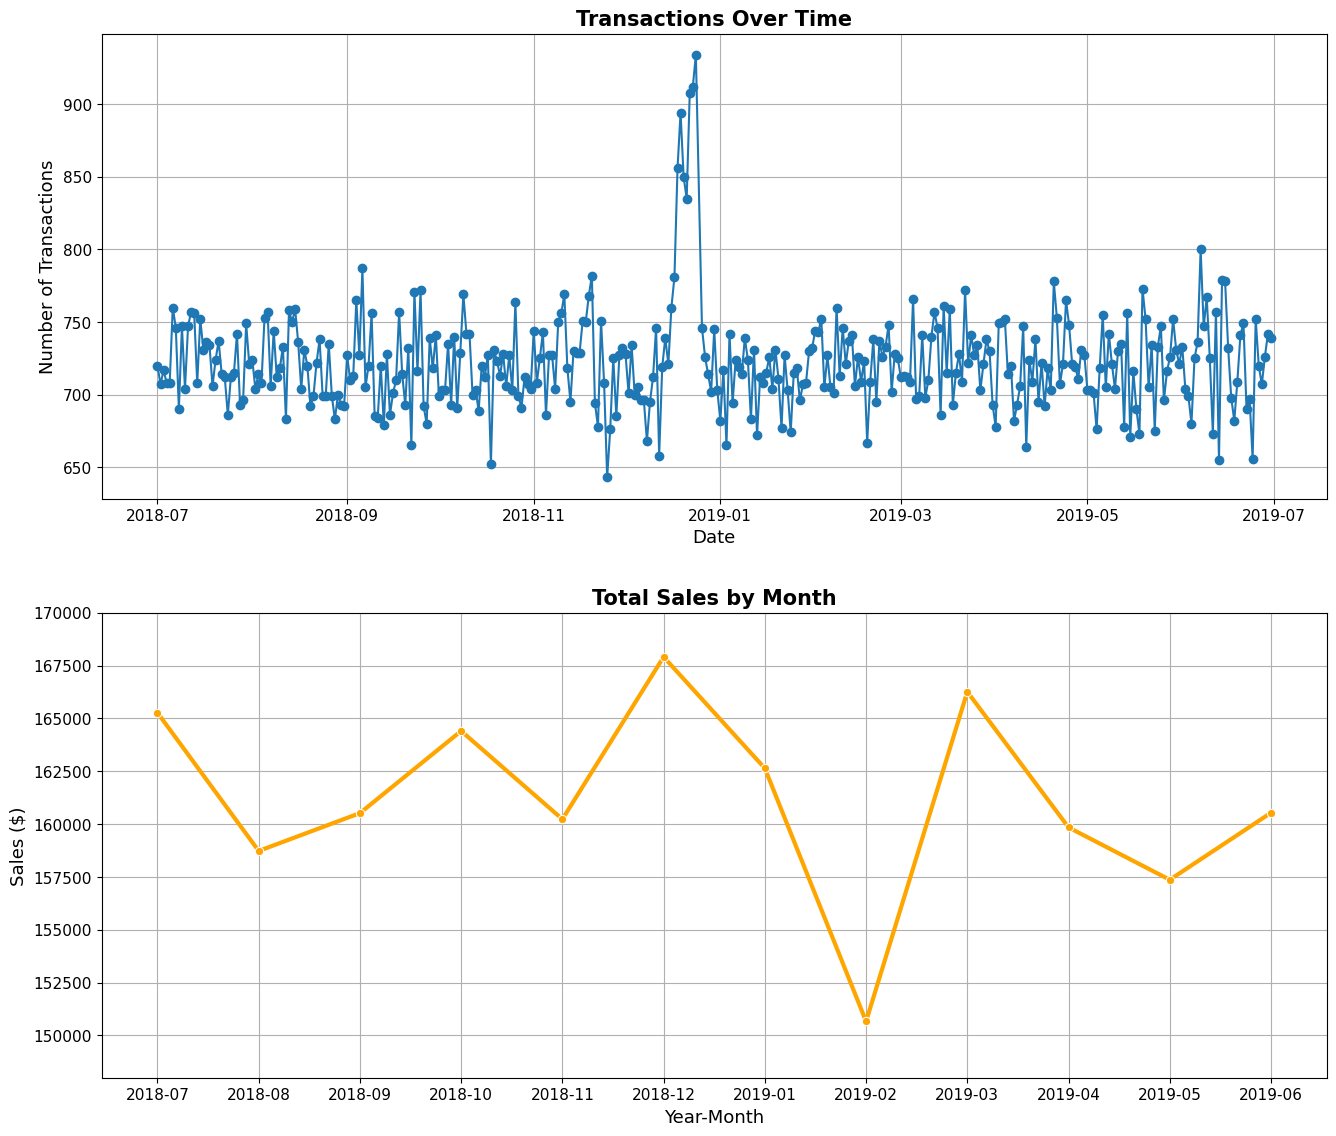

In [56]:
# analyze Sales Drivers (Time of Year)
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# plotting Transactions Over Time
transactions_over_time = full_df.groupby('Date')['TransactionID'].nunique()
axes[0].plot(transactions_over_time.index, transactions_over_time.values, marker='o')
axes[0].set_title('Transactions Over Time', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=13)
axes[0].set_ylabel('Number of Transactions', fontsize=13)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].grid(True)

# plotting Total Sales by Month
monthlySales = (
    full_df.groupby(full_df['Date'].dt.to_period('M').astype(str).rename('yearMonth'))
    ['TotalSales'].sum().reset_index()
    )
sns.lineplot(data=monthlySales, x='yearMonth', y='TotalSales', color='orange', marker='o', ax=axes[1], linewidth=3)
axes[1].set_title("Total Sales by Month", fontsize=15, fontweight='bold')
axes[1].set_xlabel('Year-Month', fontsize=13)
axes[1].set_ylabel('Sales ($)', fontsize=13)
axes[1].set_ylim([148000, 170000])
axes[1].tick_params(axis='both', labelsize=11)
axes[1].grid(True)

plt.tight_layout(pad=3)
plt.show()

**Transactions Over Time:**
- The number of transactions generally fluctuated between 650 and 775 from July 2018 to mid-December 2018 and from January 2019 to July 2019.
- There is a noticeable increase around late December 2018, which may be due to preparations for the New Year., with transaction numbers exceeding 900.


**Total Sales by Month:**
- Monthly sales typically ranged from $150,000 to $170,000.
- Peak sales months were November 2018 (around $167,500) and March 2019 (around $166,00).
- The lowest sales month was February 2019, dropping to just over $150,000.


**Relationship between Charts:**
- The spike in transaction count in late December 2018 did not align with the absolute highest sales month, which occurred in November 2018. This suggests that the high transaction volume during the spike period might have involved cheaper transactions on average compared to other periods.

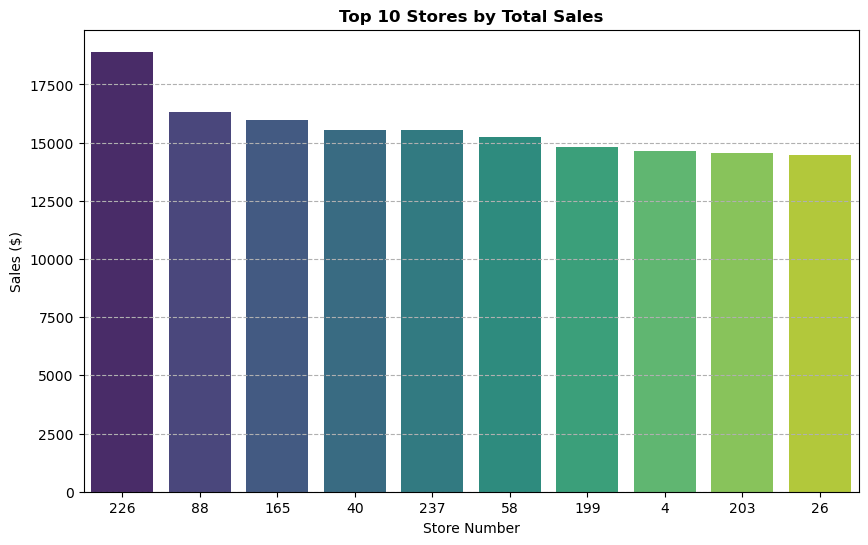

In [57]:
# analyze Sales Drivers (Store Number)
salesByStore = full_df.groupby('StoreNumber')['TotalSales'].sum().sort_values(ascending=False).reset_index()
top10Stores = salesByStore.head(10)
storesOrdered = top10Stores['StoreNumber'].tolist()
plt.figure(figsize=(10,6))
sns.barplot(data=top10Stores, x='StoreNumber', y='TotalSales', order=storesOrdered, palette='viridis')
plt.title('Top 10 Stores by Total Sales', fontweight='bold')
plt.xlabel('Store Number')
plt.ylabel('Sales ($)')
plt.grid(True, axis='y', linestyle='--')
plt.show()

**Leading Performer:** Store 226 stands out as the highest performing store, achieving total sales exceeding $18,000, which is a significantly larger amount than the second highest store. 

**Top Tier:** The top six stores (226, 88, 165, 40, 237, 58) achieved sales exceeding $15,000. 

Consistent performance within the top 10 stores: The sales figures of the top 10 stores range from about $14,500 to just over $18,000.

In [58]:
# analyze Sales Drivers (Brand Name)
full_df['brandName'] = full_df['ProductName'].str.split().str[0]
full_df['brandName'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Old', 'Tyrrells',
       'Dorito', 'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red',
       'GrnWves', 'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD',
       'Infzns', 'Burger', 'NCC', 'Cheezels', 'Smith', 'Woolworths',
       'French', 'Sunbites', 'Cheetos', 'Snbts'], dtype=object)

In [59]:
# fix some brand names like (dorito -> doritos)
correctNames = {
    'dorito': 'doritos',
    'snbts': 'sunbites',
    'rrd': 'red',
    'infzns': 'infuzions',
    'smith': 'smith\'s',
    'smiths': 'smith\'s'
}
full_df['brandName'].replace(correctNames, inplace=True)
full_df['brandName'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Old', 'Tyrrells',
       'Dorito', 'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red',
       'GrnWves', 'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD',
       'Infzns', 'Burger', 'NCC', 'Cheezels', 'Smith', 'Woolworths',
       'French', 'Sunbites', 'Cheetos', 'Snbts'], dtype=object)

<Figure size 1200x1000 with 0 Axes>

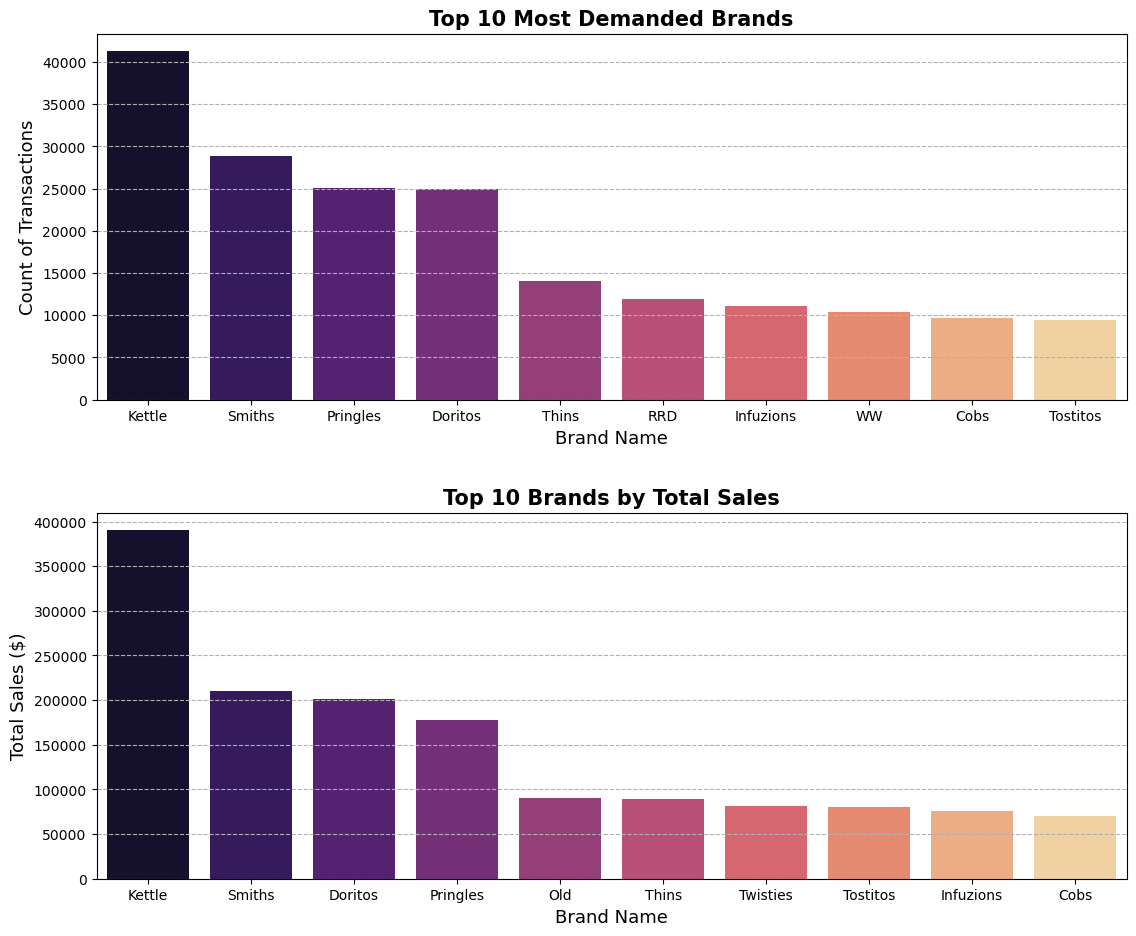

In [60]:
# Visualize top 10 brands based on demand and sales
plt.figure(figsize=(12, 10))  # Single consistent figure size
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# plotting Brand Demand
brandDemand = full_df.groupby('brandName')['TransactionID'].count().sort_values(ascending=False).head(10).reset_index()
brandDemand.rename(columns={'brandName': 'Brand', 'TransactionID': 'Demand'}, inplace=True)
sns.barplot(data=brandDemand, x='Brand', y='Demand', palette='magma', ax=axes[0])
axes[0].set_title('Top 10 Most Demanded Brands', fontsize=15, fontweight='bold')  # Fixed typo in title
axes[0].set_ylabel('Count of Transactions', fontsize=13)
axes[0].set_xlabel('Brand Name', fontsize=13)
axes[0].tick_params(axis='x')
axes[0].grid(True, axis='y', linestyle='--')

# plotting Brand Total Sales
brandTotalSales = full_df.groupby('brandName')['TotalSales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=brandTotalSales, x='brandName', y='TotalSales', palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Brands by Total Sales', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Total Sales ($)', fontsize=13)  # Added currency indicator
axes[1].set_xlabel('Brand Name', fontsize=13)
axes[1].tick_params(axis='x')
axes[1].grid(True, axis='y', linestyle='--')

plt.tight_layout(pad=3)
plt.show()

**Kettle**, **Smith's**, and **Doritos** appear in both top 10 lists, indicating they are market leaders in both customer demand and revenue generation.

**Kettle** is the leading brand in both metrics, which indicates it's strong brand loyality and sales volumes.

**Doritos** ranks higher in sales than in transactions, implying their products might have premium pricing compared to competitors like **Smith's** (that has more transactions but lower total sales).

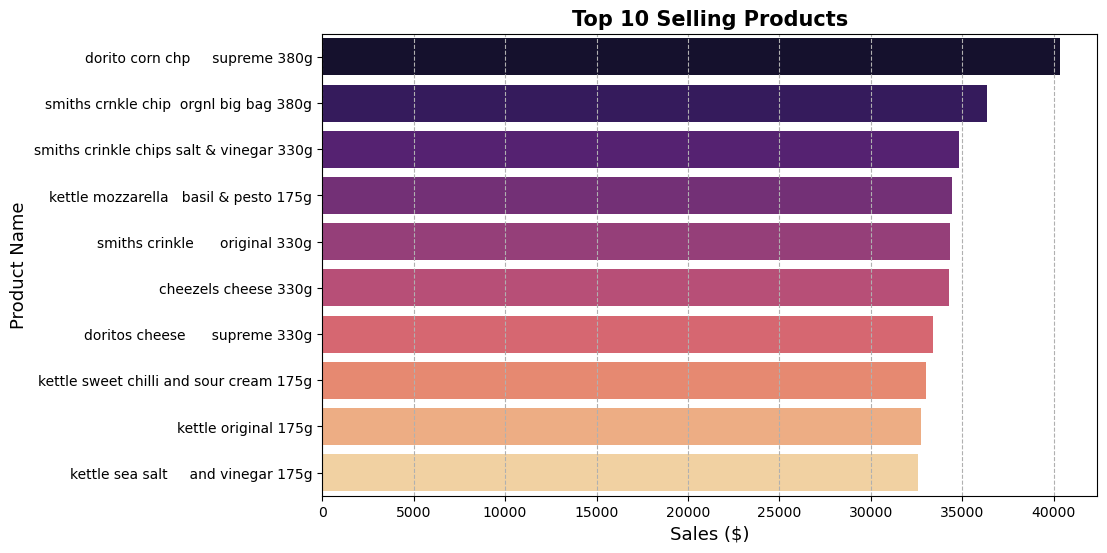

In [61]:
# analyze Sales Drivers (Product Type)
full_df['ProductName'] = full_df['ProductName'].str.strip().str.lower()
productSales = full_df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=productSales, x='TotalSales', y='ProductName', palette='magma')
plt.title('Top 10 Selling Products', fontsize=15, fontweight='bold')
plt.xlabel('Sales ($)', fontsize=13)
plt.ylabel('Product Name', fontsize=13)
plt.grid(True, axis='x', linestyle='--')
plt.show()

**"dorito corn chp supreme 380g"** is the clear best selling product, the thing that may suggests exceptional consumer preference or good marketing for the product.

**"smiths crmkle chip orgnl big bag 380g"** hold a strong second place.

There's a clear gap between the top two products and the rest of the top 10.
Products from the 3rd to the 8th position have relatively similar sales range, mostly ranging between $32,500 and $35,000.

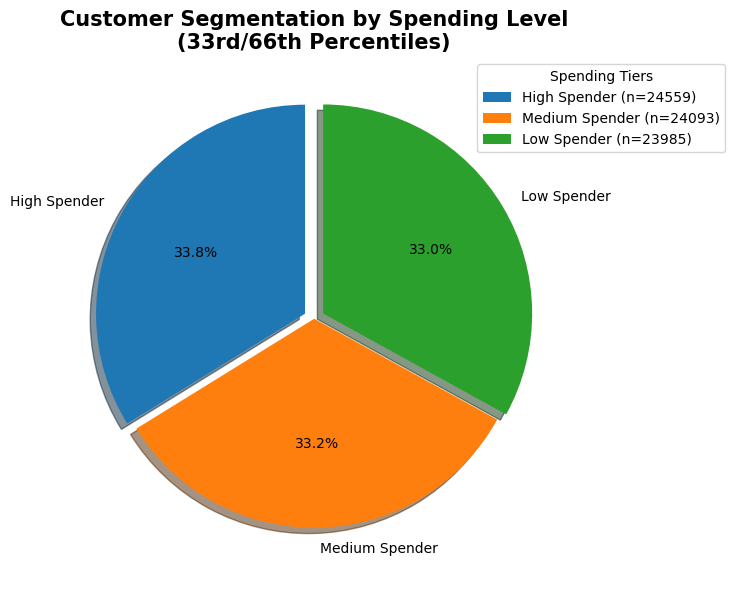

In [62]:
# Customer Spending Segments
customerSpend = full_df.groupby('LoyalityCardNumber')['TotalSales'].sum().reset_index()
quantiles = customerSpend['TotalSales'].quantile([0.33, 0.66])
low, high = quantiles.iloc[0], quantiles.iloc[1]

def segment(amount):
    if amount <= low: 
        return 'Low Spender'
    elif amount <= high:
        return 'Medium Spender'
    else:
        return 'High Spender'

customerSpend['Segment'] = customerSpend['TotalSales'].apply(segment)

plt.figure(figsize=(9, 6))
segment_counts = customerSpend['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90,
        explode=(0.05, 0, 0.05), shadow=True)
plt.title('Customer Segmentation by Spending Level\n(33rd/66th Percentiles)', fontsize=15, fontweight='bold')
plt.legend(title='Spending Tiers', bbox_to_anchor=(1.3, 1),
          labels=[f'{label} (n={count})' for label, count in zip(segment_counts.index, segment_counts)])
plt.tight_layout()
plt.show()

The plot shows no dominant spending group, nearly equal proportions between segements.

### Deeping Dive into Customer Segments

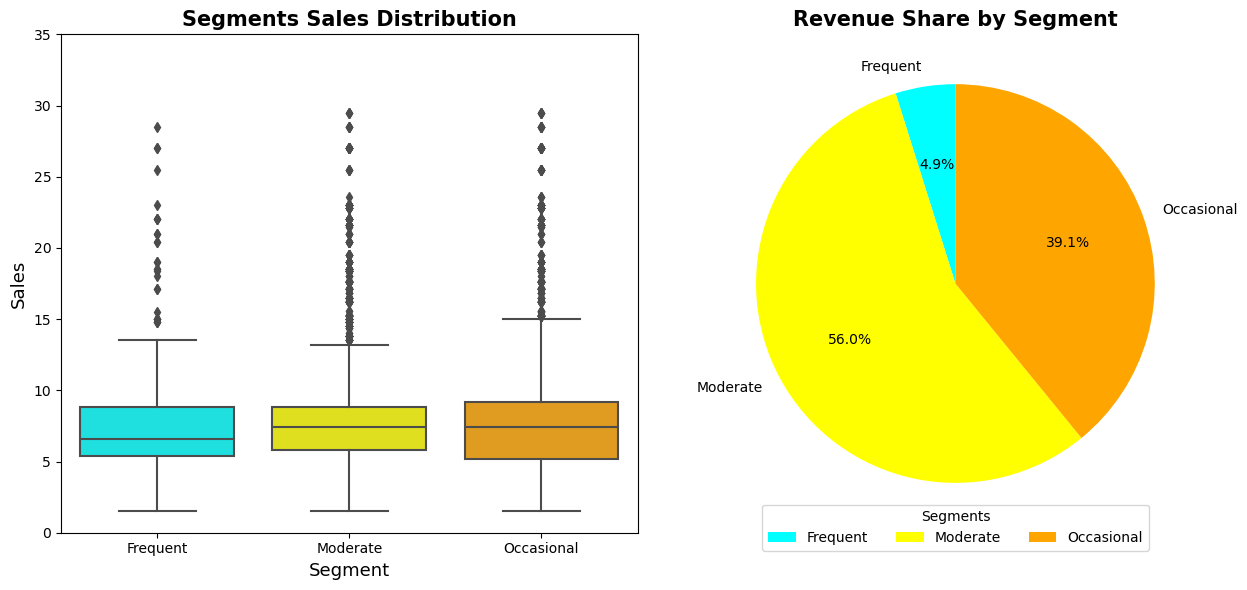

In [63]:
# defining Frequency Segments
customerTransactionCount = full_df.groupby('LoyalityCardNumber').agg(TransactionCount=('TransactionID', 'nunique')).reset_index()

def customerFreq(count):
    if count > 10:
        return 'Frequent'
    elif count > 4:
        return 'Moderate'
    else:
        return 'Occasional'

customerTransactionCount['Segment'] = customerTransactionCount['TransactionCount'].apply(customerFreq)

# merge back with original
mergedSegments = pd.merge(full_df, customerTransactionCount, how='inner', on='LoyalityCardNumber')[['LoyalityCardNumber', 'Segment', 'TotalSales']]
segmentRevenue = mergedSegments.groupby('Segment')['TotalSales'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13,6))

segment_order = ['Frequent', 'Moderate', 'Occasional']
segment_palette = {
    'Frequent': 'aqua',
    'Moderate': 'yellow',
    'Occasional': 'orange'
}
color_list = [segment_palette[seg] for seg in segment_order]

# boxplot for sales distribution
sns.boxplot(data=mergedSegments, y='TotalSales', x='Segment', ax=axes[0],
            order=segment_order, palette=segment_palette)
axes[0].set_title('Segments Sales Distribution', fontsize=15, fontweight='bold')
axes[0].set_ylim([0, 35])
axes[0].set_ylabel('Sales', fontsize=13)
axes[0].set_xlabel('Segment', fontsize=13)

# pie chart revenue proportions for segments
axes[1].pie(segmentRevenue['TotalSales'], 
            labels=segmentRevenue['Segment'],
            startangle=90, 
            autopct='%1.1f%%',
            colors=[segment_palette[seg] for seg in segmentRevenue['Segment']])
axes[1].set_title('Revenue Share by Segment', fontsize=15, fontweight='bold')
axes[1].legend(title='Segments', ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

From the Bar Plot:
- The **Occasional** segment has the most variability in sales I have narrowed the limits of y axis as there was one outlier(600 USD) to focus on the main group.
- The **Moderate** and **Frequent** segments have approximately the same variability, but Frequent segment has a slightly **lower median** value.

From the Pie Chart:
- **Moderate** Segemnt is the primary driver of revenue with share over the half of revenue 56%.
- **Occasional** Segment contributes 39.1% of the total revenue the second to Moderate nearly 40%.
- **Frequent** Segment has smallest share of revenue 4.9%.

The Occasional segment has variable sales but contributes significantly to revenue (39.1%). This implies that occasional customers may make larger transactions when they do purchase.

The moderate segment presents a balance, showing moderate consistency in sales and contributing the largest share of revenue (56.0%).